In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

In [104]:
from api_keys import weather_api_key
from citipy import citipy

# General Cities List

In [105]:
output_data_file = "output_data/cities.csv"
cities_wth = pd.read_csv(output_data_file)
cities_wth

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [106]:
lat_range =(-90,90)
lng_range =(-180,180)

In [107]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

616

# API Call

In [108]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


lat = []
lng = []
hum = []
contr = []
name = []
date = []
max_temp = []
wd_sp = []
cld = []

for city in cities:
    try:
        print(f"Processing {city}.")
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        contr.append(response['sys']['country'])
        name.append(response['name'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        wd_sp.append(response['wind']['speed'])
        cld.append(response['clouds']['all'])
    except (KeyError):
        print("City no found. Skipping..")


Processing ushuaia.
Processing provideniya.
Processing chuy.
Processing matsanga.
City no found. Skipping..
Processing bluff.
Processing joshimath.
Processing mana.
Processing rikitea.
Processing vaini.
Processing vaitupu.
City no found. Skipping..
Processing nizwa.
Processing busselton.
Processing ibra.
Processing avarua.
Processing vyazemskiy.
Processing tazovskiy.
Processing lebu.
Processing mahebourg.
Processing tsihombe.
City no found. Skipping..
Processing butaritari.
Processing khatanga.
Processing arraial do cabo.
Processing hermanus.
Processing fortuna.
Processing taolanaro.
City no found. Skipping..
Processing mataura.
Processing el badari.
City no found. Skipping..
Processing srednekolymsk.
Processing puerto ayora.
Processing bredasdorp.
Processing cherskiy.
Processing barentsburg.
City no found. Skipping..
Processing cape town.
Processing saleaula.
City no found. Skipping..
Processing atuona.
Processing georgetown.
Processing hasaki.
Processing tienen.
Processing sao joao d

Processing kirakira.
Processing thanh hoa.
Processing denham springs.
Processing vieux-habitants.
Processing lalibela.
Processing bogorodskoye.
Processing halalo.
City no found. Skipping..
Processing telimele.
Processing samalaeulu.
City no found. Skipping..
Processing thinadhoo.
Processing big spring.
Processing andenes.
City no found. Skipping..
Processing avesta.
Processing laguna.
Processing malwan.
City no found. Skipping..
Processing shwebo.
Processing pyapon.
Processing tiksi.
Processing adamas.
Processing kot samaba.
Processing watsa.
Processing jiuquan.
Processing juneau.
Processing thompson.
Processing buala.
Processing los llanos de aridane.
Processing pangnirtung.
Processing teya.
Processing gardenstown.
Processing lapusnicel.
Processing khandbari.
Processing yerofey pavlovich.
Processing maple creek.
Processing menongue.
Processing santa cruz.
Processing alofi.
Processing esperance.
Processing lazaro cardenas.
Processing sorvag.
City no found. Skipping..
Processing ibia.
P

In [109]:
len(cities)

616

In [110]:
len(cld)

546

In [111]:
weather_dict = {
   "City": name,
    "Cloudiness": cld,
    "Country":contr,
    "Date": date,
    "Humidity": hum,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wd_sp
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,20,AR,1570079116,97,-54.81,-68.31,41.00,26.40
1,Provideniya,75,RU,1570079116,86,64.42,-173.23,37.40,15.66
2,Chuy,80,UY,1570078949,78,-33.69,-53.46,56.29,11.86
3,Bluff,0,AU,1570079117,23,-23.58,149.07,82.89,15.48
4,Joshimath,0,IN,1570079117,52,30.57,79.57,61.56,6.49
...,...,...,...,...,...,...,...,...,...
541,Palu,32,ID,1570079404,83,-0.90,119.87,80.78,3.22
542,Te Anau,20,NZ,1570079404,85,-45.41,167.72,43.04,10.04
543,Lujiang,40,CN,1570079404,48,31.26,117.28,86.00,4.47
544,Umm Lajj,0,SA,1570079404,77,25.02,37.27,83.39,11.63


In [112]:
weather_data.to_csv("Weather_Cities.csv",encoding="utf-8", index=False)

# Temperature(F) vs. Latitude

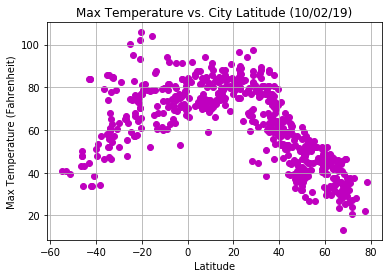

In [113]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",color="m")

plt.title("Max Temperature vs. City Latitude (10/02/19)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Max Temperature vs City Latitude")
plt.show()

As expected, in the northern hemisphere, the max temperatures are lower than max temperatures in the southern hemisphere. At this time of the year, the northern hemisphere is becoming colder (fall season) and the southern hemisphere is becoming hotter (spring season). The equator's temperature, around 80 degrees Fahrenheit, also is expected this time of year. 

# Humidity(%) vs. Latitude

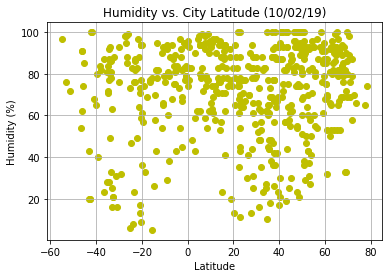

In [114]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",color="y")

plt.title("Humidity vs. City Latitude (10/02/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Humidity vs City Latitude.png")
plt.show()

The humidity is remarkably uniform around the globe.  There are high humidities at all different latitudes.

# Cloudiness vs. Latitude

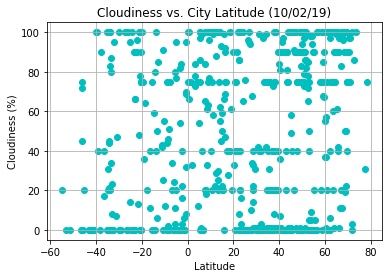

In [115]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",color="c")

plt.title("Cloudiness vs. City Latitude (10/02/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Cloudiness vs City Latitude.png")
plt.show()

Cloud cover is also uniform across the globe.

# Wind Speed vs. Latitude

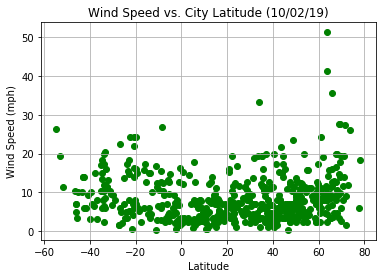

In [116]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",color="g")

plt.title("Wind Speed vs. City Latitude (10/02/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Images/Wind Speed vs City Latitude.png")
plt.show()

The wind speed for all the latitudes tends to range between 0 mph to 20 mph.

# Northern Hemisphere: Temperature, Humidity, Cloudiness, Wind Speed against Latitude 

In [117]:
north_hem = weather_data.loc[(weather_data["Lat"] >= 0)]
north_hem = pd.DataFrame(north_hem)
north_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Provideniya,75,RU,1570079116,86,64.42,-173.23,37.40,15.66
4,Joshimath,0,IN,1570079117,52,30.57,79.57,61.56,6.49
5,Mana,30,NG,1570079117,83,13.03,5.27,76.72,7.11
7,Vaini,20,IN,1570078776,78,15.34,74.49,78.80,6.93
8,Nizwa,0,OM,1570079118,45,22.93,57.53,83.61,5.95
...,...,...,...,...,...,...,...,...,...
537,Las Vegas,75,US,1570079352,18,36.17,-115.15,66.20,5.82
540,Sassandra,54,CI,1570079403,98,4.95,-6.09,71.53,0.76
543,Lujiang,40,CN,1570079404,48,31.26,117.28,86.00,4.47
544,Umm Lajj,0,SA,1570079404,77,25.02,37.27,83.39,11.63


# Northern Hemisphere -->Temperature vs. Latitude

1      39.153140
4      66.998862
5      81.427635
7      79.527381
8      73.283687
         ...    
537    62.392184
540    88.074413
543    66.431254
544    71.564409
545    60.697585
Name: Lat, Length: 398, dtype: float64
y = -0.82x +92.15
The r-squared is: -0.85099196846216


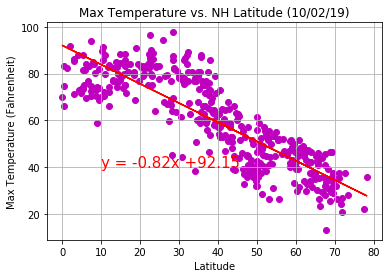

In [118]:
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature vs. NH Latitude (10/02/19)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Max Temperature vs NH Latitude.png")
plt.show()

The max temperature decreases the further the latitude is from the equator.  There is a high correlation between max temperature and latitude.

# Northern Hemisphere --> Humidity vs. Latitude

The r-squared is: 0.043959392430936176


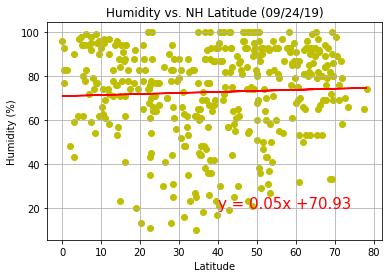

In [119]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. NH Latitude (09/24/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Humidity vs NH Latitude.png")
plt.show()

There is little correlation between humidity and latitude in the northern hemisphere.

# Northern Hemisphere --> Cloudiness vs. Latitude

The r-squared is: 0.10095430502728896


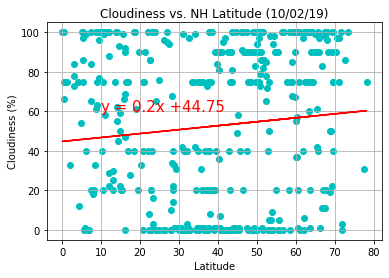

In [120]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values,color="c")
plt.plot(x_values,regress_values,"r-")
plt.title("Cloudiness vs. NH Latitude (10/02/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Cloudiness vs NH Latitude.png")
plt.show()

There is little correlation between cloud cover and latitude in the northern hemisphere.

# Northern Hemisphere --> Wind Speed vs. Latitude

The r-squared is: 0.3120789746668926


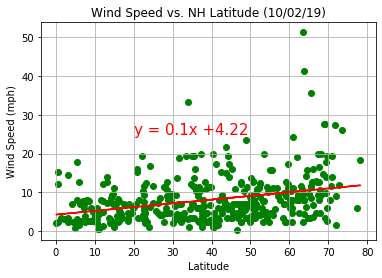

In [121]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Wind Speed vs. NH Latitude (10/02/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Wind Speed vs NH Latitude.png")
plt.show()

There is a limited correlation between wind speed and latitutde in the northern hemisphere.

# Southern Hemisphere: Temperature, Humidity, Cloudiness, Wind Speed against Latitude

In [122]:
south_hem = weather_data.loc[(weather_data["Lat"] < 0)]
south_hem = pd.DataFrame(south_hem)
south_hem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,20,AR,1570079116,97,-54.81,-68.31,41.00,26.40
2,Chuy,80,UY,1570078949,78,-33.69,-53.46,56.29,11.86
3,Bluff,0,AU,1570079117,23,-23.58,149.07,82.89,15.48
6,Rikitea,66,PF,1570078788,76,-23.12,-134.97,66.69,14.74
9,Busselton,87,AU,1570078929,33,-33.64,115.35,78.01,10.29
...,...,...,...,...,...,...,...,...,...
536,Antofagasta,90,CL,1570079401,76,-23.65,-70.40,57.20,3.36
538,Margate,0,AU,1570079252,20,-43.03,147.26,84.00,13.87
539,Joacaba,100,BR,1570079403,98,-27.18,-51.50,65.20,1.61
541,Palu,32,ID,1570079404,83,-0.90,119.87,80.78,3.22


# Southern Hemisphere -->Temperature vs. Latitude

0      49.834244
2      62.111504
3      67.988545
6      68.255947
9      62.140570
         ...    
536    67.947853
538    56.682072
539    65.895830
541    81.172648
542    55.298555
Name: Lat, Length: 148, dtype: float64
y = 0.58x +81.7
The r-squared is: 0.5344291624890508


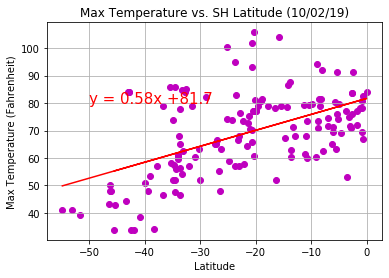

In [123]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="m")
plt.plot(x_values,regress_values,"r-")
plt.title("Max Temperature vs. SH Latitude (10/02/19)")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
print(regress_values)
print(line_eq)
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Max Temperature vs SH Latitude.png")
plt.show()

There is a correlation a between max temperature and latitude in the southern hemisphere, but the correlation is not as strong as in the northern hemisphere.

# Southern Hemisphere --> Humidity vs. Latitude

The r-squared is: 0.15637612049673516


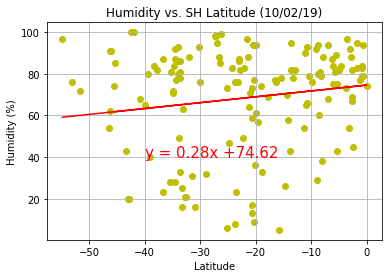

In [124]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title("Humidity vs. SH Latitude (10/02/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Humidity vs SH Latitude.png")
plt.show()

There is little correlation between humidity and latitude in the southern hemisphere.

# Southern Hemisphere --> Cloudiness vs. Latitude

The r-squared is: 0.05713818942921616


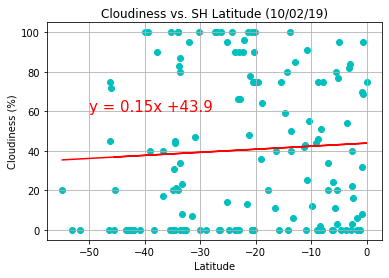

In [125]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values,color="c")
plt.plot(x_values,regress_values,"r-")
plt.title("Cloudiness vs. SH Latitude (10/02/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Cloudiness vs SH Latitude.png")
plt.show()

There is little correlation between cloud cover and latitude in the southern hemisphere.

# Southern Hemisphere --> Wind Speed vs. Latitude

The r-squared is: -0.21938075568856147


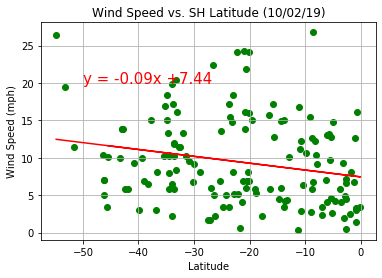

In [126]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="g")
plt.plot(x_values,regress_values,"r-")
plt.title("Wind Speed vs. SH Latitude (10/02/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/Wind Speed vs SH Latitude")
plt.show()

There is a limited correlation between wind speed and latitutde in the southern hemisphere.